In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
df = pd.read_csv("dataSetCrossValWithKeys.csv",names=['fold','class','feature1','feature2'])
df.head()

,fold,class,feature1,feature2
0,2,1,0.485120,-0.131560
1,1,1,0.449150,0.436860
2,2,0,-0.103350,0.403760
3,2,0,-0.356590,-0.006701
4,2,0,-0.078828,-0.013261


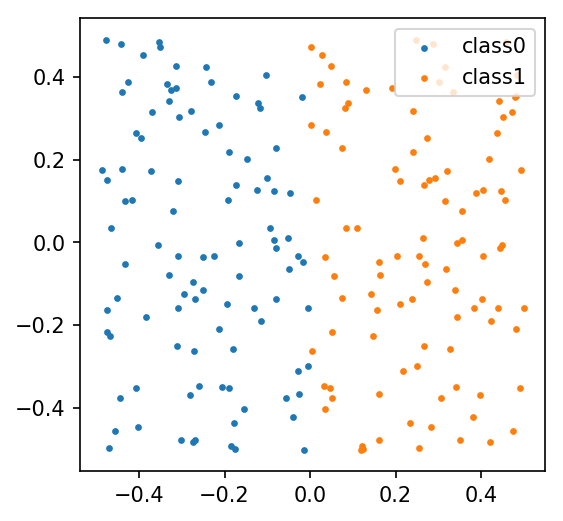

In [3]:
fig = plt.figure(figsize=(4,4),dpi=150)
plt.scatter(df[df['class']==0]['feature1'],df[df['class']==0]['feature2'],label='class0',s=5)
plt.scatter(df[df['class']==1]['feature1'],df[df['class']==0]['feature2'],label='class1',s=5)
plt.legend()

In [4]:
'''
def trainKNN(df, k):
    X = df[['feature1','feature2']]
    y = df['class']
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X, y)
    return clf, df, k
'''

"\ndef trainKNN(df, k):\n    X = df[['feature1','feature2']]\n    y = df['class']\n    clf = KNeighborsClassifier(n_neighbors=k)\n    clf.fit(X, y)\n    return clf, df, k\n"

In [5]:
'''
def plotROC(clf, df, k, plot=True):
    scores = clf.predict_proba(df[['feature1','feature2']])[:,1]
    fpr, tpr, thresholds = metrics.roc_curve(df['class'], scores)
    P_H1 = len(df[df['class']==1])/len(df)
    P_H0 = len(df[df['class']==0])/len(df)
    P_cd = P_H1 * tpr + P_H0 * (1 - fpr)
    P_cd_max = P_cd.max()
    P_cd_idxmax = np.argmax(P_cd)
    plt.figure(dpi=150)
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr[P_cd_idxmax], tpr[P_cd_idxmax], marker='s',label='max $P_{cd}$=%.3f' %P_cd_max)
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('$P_{FA}$')
    plt.ylabel('$P_D$')
    plt.legend(loc="lower right")
    plt.title('Receiver Operating Characteristic (k = %i)'% k)
    if plot:
        plt.show()
    else:
        plt.close()
    P_cd_min = 1 - P_cd_max
    return P_cd_min
'''

'\ndef plotROC(clf, df, k, plot=True):\n    scores = clf.predict_proba(df[[\'feature1\',\'feature2\']])[:,1]\n    fpr, tpr, thresholds = metrics.roc_curve(df[\'class\'], scores)\n    P_H1 = len(df[df[\'class\']==1])/len(df)\n    P_H0 = len(df[df[\'class\']==0])/len(df)\n    P_cd = P_H1 * tpr + P_H0 * (1 - fpr)\n    P_cd_max = P_cd.max()\n    P_cd_idxmax = np.argmax(P_cd)\n    plt.figure(dpi=150)\n    plt.plot(fpr, tpr)\n    plt.plot([0, 1], [0, 1], linestyle=\'--\')\n    plt.plot(fpr[P_cd_idxmax], tpr[P_cd_idxmax], marker=\'s\',label=\'max $P_{cd}$=%.3f\' %P_cd_max)\n    plt.xlim([-0.05, 1.0])\n    plt.ylim([0.0, 1.05])\n    plt.xlabel(\'$P_{FA}$\')\n    plt.ylabel(\'$P_D$\')\n    plt.legend(loc="lower right")\n    plt.title(\'Receiver Operating Characteristic (k = %i)\'% k)\n    if plot:\n        plt.show()\n    else:\n        plt.close()\n    P_cd_min = 1 - P_cd_max\n    return P_cd_min\n'

Text(0.5, 1.0, 'Receiver Operating Characteristic (k = 5)')

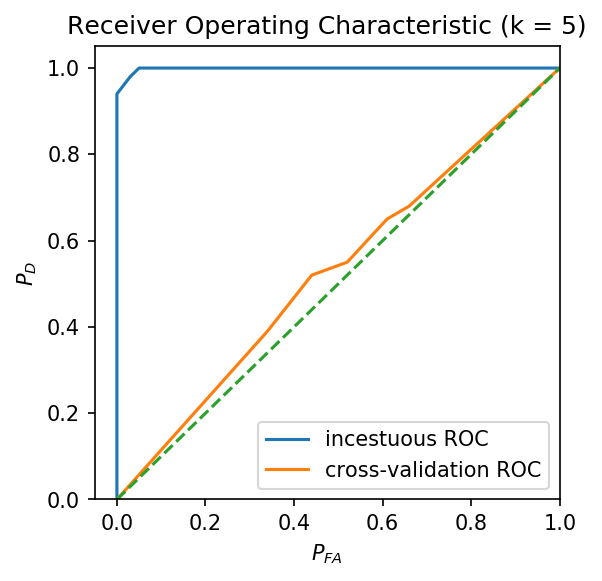

In [6]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(df[['feature1','feature2']],df['class'])
scores = clf.predict_proba(df[['feature1','feature2']])[:,1]
fpr, tpr, thresholds = metrics.roc_curve(df['class'], scores)
clf_1 = KNeighborsClassifier(n_neighbors=5)
clf_1.fit(df[df['fold']==1][['feature1','feature2']],df[df['fold']==1]['class'])
scores_1 = clf_1.predict_proba(df[df['fold']==2][['feature1','feature2']])[:,1]
clf_2 = KNeighborsClassifier(n_neighbors=5)
clf_2.fit(df[df['fold']==2][['feature1','feature2']],df[df['fold']==2]['class'])
scores_2 = clf_2.predict_proba(df[df['fold']==1][['feature1','feature2']])[:,1]
scores_ave = np.concatenate((scores_1,scores_2))
label_ave = np.concatenate((df[df['fold']==2]['class'],df[df['fold']==1]['class']))
fpr_ave, tpr_ave, thresholds_ave = metrics.roc_curve(label_ave, scores_ave)
plt.figure(figsize=(4,4),dpi=150)
plt.plot(fpr, tpr, label='incestuous ROC')
plt.plot(fpr_ave, tpr_ave, label='cross-validation ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic (k = %i)'% 5 )

In [7]:
def plotKNNStatisticSurface(clf, df, k):
    f1_min, f1_max = df['feature1'].min() - 0.2, df['feature1'].max() + 0.2
    f2_min, f2_max = df['feature2'].min() - 0.2, df['feature2'].max() + 0.2
    ff1, ff2 = np.meshgrid(np.arange(f1_min, f1_max, 0.01), np.arange(f2_min, f2_max, 0.01))
    X_test = np.c_[ff1.ravel(), ff2.ravel()]
    Z = clf.predict_proba(X_test)
    Z = Z[:,1]
    Z = Z.reshape(ff1.shape)
    Z_contour = clf.predict(X_test)
    Z_contour = Z_contour.reshape(ff1.shape)
    plt.figure(dpi=150)
    colors = ['azure', 'royalblue']
    cm = LinearSegmentedColormap.from_list('my', colors, N=k+1)
    plt.contour(ff1, ff2, Z_contour, colors='gold', linewidths=1)
    plt.pcolormesh(ff1, ff2, Z, cmap=cm)
    plt.colorbar()
    plt.scatter(df[df['class']==0]['feature1'],df[df['class']==0]['feature2'],c='b',s=5,label='$H_0$')
    plt.scatter(df[df['class']==1]['feature1'],df[df['class']==1]['feature2'],c='orangered',s=5,label='$H_1$')
    plt.legend()
    plt.xlim(f1_min, f1_max)
    plt.ylim(f2_min, f2_max)
    plt.title("2-Class classification (k = %i)"% k)
    plt.show()

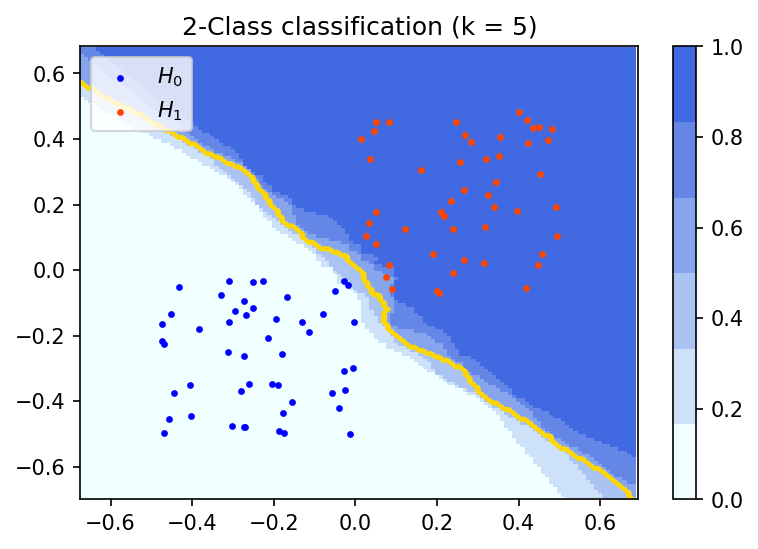

In [8]:
plotKNNStatisticSurface(clf_1,df[df['fold']==1],5)

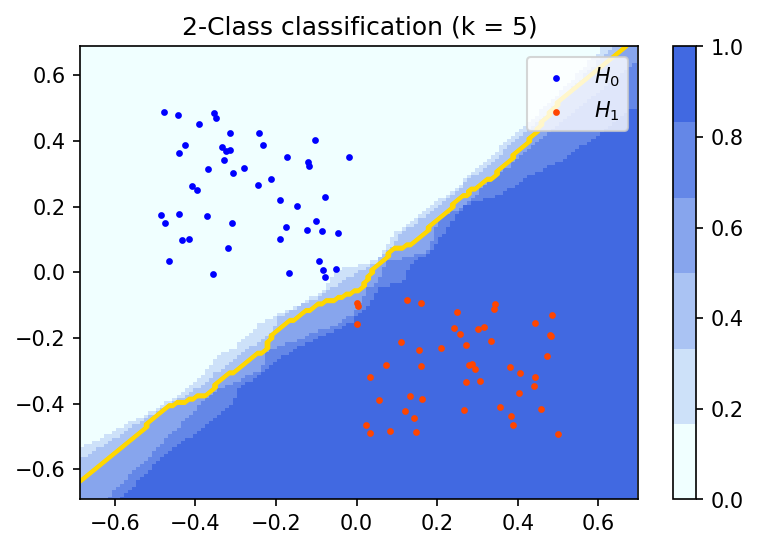

In [9]:
plotKNNStatisticSurface(clf_2,df[df['fold']==2],5)

In [16]:
a = np.ones(int(len(df)/2))
b = 2*np.ones(int(len(df)/2))
key = np.concatenate((a,b))
np.random.shuffle(key)
df['fold_new'] = key
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(df[['feature1','feature2']],df['class'])
scores = clf.predict_proba(df[['feature1','feature2']])[:,1]
fpr, tpr, thresholds = metrics.roc_curve(df['class'], scores)
clf_1 = KNeighborsClassifier(n_neighbors=5)
clf_1.fit(df[df['fold_new']==1][['feature1','feature2']],df[df['fold_new']==1]['class'])
scores_1 = clf_1.predict_proba(df[df['fold_new']==2][['feature1','feature2']])[:,1]
clf_2 = KNeighborsClassifier(n_neighbors=5)
clf_2.fit(df[df['fold_new']==2][['feature1','feature2']],df[df['fold_new']==2]['class'])
scores_2 = clf_2.predict_proba(df[df['fold_new']==1][['feature1','feature2']])[:,1]
scores_ave = np.concatenate((scores_1,scores_2))
label_ave = np.concatenate((df[df['fold_new']==2]['class'],df[df['fold_new']==1]['class']))
fpr_ave, tpr_ave, thresholds_ave = metrics.roc_curve(label_ave, scores_ave)

Text(0.5, 1.0, 'Receiver Operating Characteristic (k = 5)')

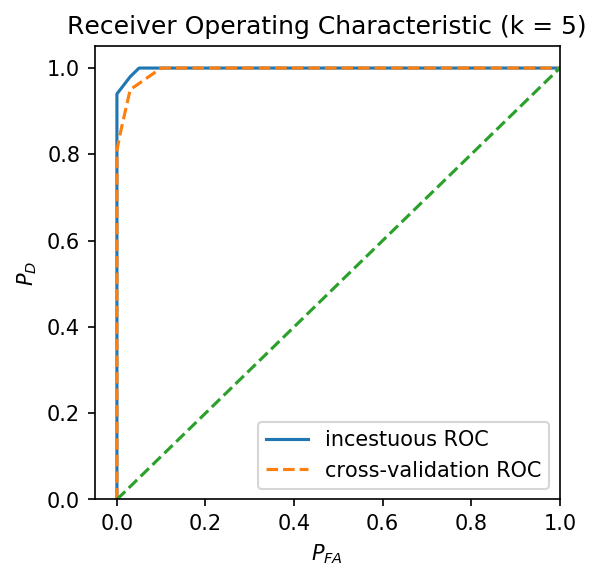

In [17]:
plt.figure(figsize=(4,4),dpi=150)
plt.plot(fpr, tpr, label='incestuous ROC')
plt.plot(fpr_ave, tpr_ave, label='cross-validation ROC',linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('$P_{FA}$')
plt.ylabel('$P_D$')
plt.legend(loc="lower right")
plt.title('Receiver Operating Characteristic (k = %i)'% 5 )